In [1]:
import pickle
import pandas as pd
import numpy as np
np.random.seed(42)
from sklearn.model_selection import train_test_split as splt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
dfy = pd.read_csv("MILANO_wSCORE.csv")
dfx = pd.read_csv("PLIC-milano-processed.csv", sep=";")

/home/webvalley/anaconda3/envs/score/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14,29,36,44,51,94,104,105,112,113,120,127,130,149,158,168,237,239,240,241,248,249,256,273,298) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df2 = dfx.replace(-1, np.nan).replace("-1", np.nan).replace(-1.0, np.nan)

In [4]:
df3 = df2.dropna(how='any', axis=1)

In [5]:
y = dfy['SCORE'].values

In [6]:
df4 = df3.select_dtypes(exclude=['object'])

In [7]:
df4 = df4.drop(labels = ['smoking', 'smoking recod', 'glucose', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [8]:
X = df4.values

In [9]:
bina = 0
for i in range(X.shape[1]):
    if (np.amax(X[:,i]) == 1):
        bina += 1
print(bina)

40


In [10]:
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()
X = X/X.max(axis=0)
y = y/50

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1504      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [12]:
print(np.amax(X))
print(np.amax(y))
X_tr, X_ts, y_tr, y_ts = splt(X, y, test_size=0.25, random_state=42)
es = EarlyStopping(patience = 20, restore_best_weights = True)

1.0
0.9832266384694833


In [13]:
model.compile(loss = 'mean_squared_error', optimizer='sgd')

In [14]:
history = model.fit(X_tr, y_tr, validation_data=(X_ts, y_ts), epochs = 2000, callbacks = [es])

Instructions for updating:
Use tf.cast instead.
Train on 4335 samples, validate on 1445 samples
Epoch 1/2000
4335/4335 [==============================] - 1s 310us/step - loss: 0.0931 - val_loss: 0.0548
Epoch 2/2000
4335/4335 [==============================] - 0s 76us/step - loss: 0.0386 - val_loss: 0.0273
Epoch 3/2000
4335/4335 [==============================] - 0s 81us/step - loss: 0.0223 - val_loss: 0.0186
Epoch 4/2000
4335/4335 [==============================] - 0s 79us/step - loss: 0.0166 - val_loss: 0.0150
Epoch 5/2000
4335/4335 [==============================] - 0s 77us/step - loss: 0.0140 - val_loss: 0.0133
Epoch 6/2000
4335/4335 [==============================] - 0s 84us/step - loss: 0.0127 - val_loss: 0.0124
Epoch 7/2000
4335/4335 [==============================] - 0s 69us/step - loss: 0.0120 - val_loss: 0.0118
Epoch 8/2000
4335/4335 [==============================] - 0s 75us/step - loss: 0.0115 - val_loss: 0.0115
Epoch 9/2000
4335/4335 [==============================] - 0s 72

4335/4335 [==============================] - 0s 72us/step - loss: 0.0083 - val_loss: 0.0084
Epoch 76/2000
4335/4335 [==============================] - 0s 83us/step - loss: 0.0083 - val_loss: 0.0084
Epoch 77/2000
4335/4335 [==============================] - 0s 83us/step - loss: 0.0083 - val_loss: 0.0083
Epoch 78/2000
4335/4335 [==============================] - 0s 104us/step - loss: 0.0082 - val_loss: 0.0083
Epoch 79/2000
4335/4335 [==============================] - 0s 89us/step - loss: 0.0082 - val_loss: 0.0083
Epoch 80/2000
4335/4335 [==============================] - 0s 90us/step - loss: 0.0082 - val_loss: 0.0083
Epoch 81/2000
4335/4335 [==============================] - 0s 76us/step - loss: 0.0082 - val_loss: 0.0083
Epoch 82/2000
4335/4335 [==============================] - 0s 83us/step - loss: 0.0082 - val_loss: 0.0083
Epoch 83/2000
4335/4335 [==============================] - 0s 83us/step - loss: 0.0082 - val_loss: 0.0082
Epoch 84/2000
4335/4335 [==============================] - 

Epoch 152/2000
4335/4335 [==============================] - 0s 96us/step - loss: 0.0075 - val_loss: 0.0077
Epoch 153/2000
4335/4335 [==============================] - 0s 82us/step - loss: 0.0075 - val_loss: 0.0077
Epoch 154/2000
4335/4335 [==============================] - 0s 80us/step - loss: 0.0075 - val_loss: 0.0077
Epoch 155/2000
4335/4335 [==============================] - 0s 83us/step - loss: 0.0075 - val_loss: 0.0077
Epoch 156/2000
4335/4335 [==============================] - 0s 86us/step - loss: 0.0075 - val_loss: 0.0077
Epoch 157/2000
4335/4335 [==============================] - 0s 74us/step - loss: 0.0075 - val_loss: 0.0077
Epoch 158/2000
4335/4335 [==============================] - 0s 85us/step - loss: 0.0075 - val_loss: 0.0077
Epoch 159/2000
4335/4335 [==============================] - 0s 72us/step - loss: 0.0075 - val_loss: 0.0077
Epoch 160/2000
4335/4335 [==============================] - 0s 94us/step - loss: 0.0075 - val_loss: 0.0077
Epoch 161/2000
4335/4335 [===========

4335/4335 [==============================] - 0s 66us/step - loss: 0.0071 - val_loss: 0.0074
Epoch 229/2000
4335/4335 [==============================] - 0s 64us/step - loss: 0.0071 - val_loss: 0.0074
Epoch 230/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0071 - val_loss: 0.0074
Epoch 231/2000
4335/4335 [==============================] - 0s 64us/step - loss: 0.0071 - val_loss: 0.0074
Epoch 232/2000
4335/4335 [==============================] - 0s 65us/step - loss: 0.0071 - val_loss: 0.0074
Epoch 233/2000
4335/4335 [==============================] - 0s 60us/step - loss: 0.0071 - val_loss: 0.0074
Epoch 234/2000
4335/4335 [==============================] - 0s 64us/step - loss: 0.0071 - val_loss: 0.0074
Epoch 235/2000
4335/4335 [==============================] - 0s 62us/step - loss: 0.0071 - val_loss: 0.0074
Epoch 236/2000
4335/4335 [==============================] - 0s 73us/step - loss: 0.0071 - val_loss: 0.0074
Epoch 237/2000
4335/4335 [==========================

4335/4335 [==============================] - 0s 71us/step - loss: 0.0068 - val_loss: 0.0072
Epoch 305/2000
4335/4335 [==============================] - 0s 68us/step - loss: 0.0068 - val_loss: 0.0072
Epoch 306/2000
4335/4335 [==============================] - 0s 64us/step - loss: 0.0068 - val_loss: 0.0072
Epoch 307/2000
4335/4335 [==============================] - 0s 62us/step - loss: 0.0068 - val_loss: 0.0072
Epoch 308/2000
4335/4335 [==============================] - 0s 63us/step - loss: 0.0068 - val_loss: 0.0072
Epoch 309/2000
4335/4335 [==============================] - 0s 68us/step - loss: 0.0068 - val_loss: 0.0072
Epoch 310/2000
4335/4335 [==============================] - 0s 61us/step - loss: 0.0068 - val_loss: 0.0072
Epoch 311/2000
4335/4335 [==============================] - 0s 63us/step - loss: 0.0068 - val_loss: 0.0072
Epoch 312/2000
4335/4335 [==============================] - 0s 68us/step - loss: 0.0068 - val_loss: 0.0072
Epoch 313/2000
4335/4335 [==========================

4335/4335 [==============================] - 0s 34us/step - loss: 0.0065 - val_loss: 0.0070
Epoch 381/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0065 - val_loss: 0.0070
Epoch 382/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0065 - val_loss: 0.0070
Epoch 383/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0065 - val_loss: 0.0070
Epoch 384/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0065 - val_loss: 0.0070
Epoch 385/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0065 - val_loss: 0.0070
Epoch 386/2000
4335/4335 [==============================] - 0s 83us/step - loss: 0.0065 - val_loss: 0.0070
Epoch 387/2000
4335/4335 [==============================] - 0s 86us/step - loss: 0.0065 - val_loss: 0.0070
Epoch 388/2000
4335/4335 [==============================] - 0s 78us/step - loss: 0.0065 - val_loss: 0.0070
Epoch 389/2000
4335/4335 [==========================

4335/4335 [==============================] - 0s 74us/step - loss: 0.0062 - val_loss: 0.0068
Epoch 457/2000
4335/4335 [==============================] - 0s 87us/step - loss: 0.0062 - val_loss: 0.0068
Epoch 458/2000
4335/4335 [==============================] - 0s 74us/step - loss: 0.0062 - val_loss: 0.0068
Epoch 459/2000
4335/4335 [==============================] - 0s 84us/step - loss: 0.0062 - val_loss: 0.0068
Epoch 460/2000
4335/4335 [==============================] - 0s 82us/step - loss: 0.0062 - val_loss: 0.0068
Epoch 461/2000
4335/4335 [==============================] - 0s 86us/step - loss: 0.0062 - val_loss: 0.0068
Epoch 462/2000
4335/4335 [==============================] - 0s 72us/step - loss: 0.0062 - val_loss: 0.0068
Epoch 463/2000
4335/4335 [==============================] - 0s 73us/step - loss: 0.0062 - val_loss: 0.0068
Epoch 464/2000
4335/4335 [==============================] - 0s 85us/step - loss: 0.0062 - val_loss: 0.0068
Epoch 465/2000
4335/4335 [==========================

4335/4335 [==============================] - 0s 82us/step - loss: 0.0059 - val_loss: 0.0065
Epoch 533/2000
4335/4335 [==============================] - 0s 81us/step - loss: 0.0059 - val_loss: 0.0065
Epoch 534/2000
4335/4335 [==============================] - 0s 87us/step - loss: 0.0059 - val_loss: 0.0065
Epoch 535/2000
4335/4335 [==============================] - 0s 84us/step - loss: 0.0059 - val_loss: 0.0065
Epoch 536/2000
4335/4335 [==============================] - 0s 78us/step - loss: 0.0059 - val_loss: 0.0065
Epoch 537/2000
4335/4335 [==============================] - 0s 89us/step - loss: 0.0059 - val_loss: 0.0065
Epoch 538/2000
4335/4335 [==============================] - 0s 81us/step - loss: 0.0059 - val_loss: 0.0065
Epoch 539/2000
4335/4335 [==============================] - 0s 84us/step - loss: 0.0059 - val_loss: 0.0065
Epoch 540/2000
4335/4335 [==============================] - 0s 81us/step - loss: 0.0059 - val_loss: 0.0065
Epoch 541/2000
4335/4335 [==========================

4335/4335 [==============================] - 0s 43us/step - loss: 0.0056 - val_loss: 0.0062
Epoch 609/2000
4335/4335 [==============================] - 0s 44us/step - loss: 0.0056 - val_loss: 0.0062
Epoch 610/2000
4335/4335 [==============================] - 0s 44us/step - loss: 0.0056 - val_loss: 0.0062
Epoch 611/2000
4335/4335 [==============================] - 0s 72us/step - loss: 0.0055 - val_loss: 0.0062
Epoch 612/2000
4335/4335 [==============================] - 0s 88us/step - loss: 0.0055 - val_loss: 0.0062
Epoch 613/2000
4335/4335 [==============================] - 0s 84us/step - loss: 0.0055 - val_loss: 0.0062
Epoch 614/2000
4335/4335 [==============================] - 0s 80us/step - loss: 0.0055 - val_loss: 0.0062
Epoch 615/2000
4335/4335 [==============================] - 0s 83us/step - loss: 0.0055 - val_loss: 0.0062
Epoch 616/2000
4335/4335 [==============================] - 0s 88us/step - loss: 0.0055 - val_loss: 0.0062
Epoch 617/2000
4335/4335 [==========================

4335/4335 [==============================] - 0s 83us/step - loss: 0.0052 - val_loss: 0.0060
Epoch 685/2000
4335/4335 [==============================] - 0s 83us/step - loss: 0.0052 - val_loss: 0.0059
Epoch 686/2000
4335/4335 [==============================] - 0s 82us/step - loss: 0.0052 - val_loss: 0.0059
Epoch 687/2000
4335/4335 [==============================] - 0s 91us/step - loss: 0.0052 - val_loss: 0.0059
Epoch 688/2000
4335/4335 [==============================] - 0s 89us/step - loss: 0.0052 - val_loss: 0.0059
Epoch 689/2000
4335/4335 [==============================] - 0s 88us/step - loss: 0.0052 - val_loss: 0.0059
Epoch 690/2000
4335/4335 [==============================] - 0s 79us/step - loss: 0.0052 - val_loss: 0.0059
Epoch 691/2000
4335/4335 [==============================] - 0s 78us/step - loss: 0.0052 - val_loss: 0.0059
Epoch 692/2000
4335/4335 [==============================] - 0s 96us/step - loss: 0.0052 - val_loss: 0.0059
Epoch 693/2000
4335/4335 [==========================

4335/4335 [==============================] - 0s 72us/step - loss: 0.0048 - val_loss: 0.0056
Epoch 761/2000
4335/4335 [==============================] - 0s 80us/step - loss: 0.0048 - val_loss: 0.0056
Epoch 762/2000
4335/4335 [==============================] - 0s 80us/step - loss: 0.0048 - val_loss: 0.0056
Epoch 763/2000
4335/4335 [==============================] - 0s 73us/step - loss: 0.0048 - val_loss: 0.0056
Epoch 764/2000
4335/4335 [==============================] - 0s 89us/step - loss: 0.0048 - val_loss: 0.0056
Epoch 765/2000
4335/4335 [==============================] - 0s 72us/step - loss: 0.0048 - val_loss: 0.0056
Epoch 766/2000
4335/4335 [==============================] - 0s 75us/step - loss: 0.0048 - val_loss: 0.0056
Epoch 767/2000
4335/4335 [==============================] - 0s 74us/step - loss: 0.0048 - val_loss: 0.0056
Epoch 768/2000
4335/4335 [==============================] - 0s 71us/step - loss: 0.0048 - val_loss: 0.0056
Epoch 769/2000
4335/4335 [==========================

4335/4335 [==============================] - 0s 34us/step - loss: 0.0044 - val_loss: 0.0053
Epoch 837/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0044 - val_loss: 0.0053
Epoch 838/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0044 - val_loss: 0.0053
Epoch 839/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0044 - val_loss: 0.0053
Epoch 840/2000
4335/4335 [==============================] - 0s 35us/step - loss: 0.0044 - val_loss: 0.0053
Epoch 841/2000
4335/4335 [==============================] - 0s 47us/step - loss: 0.0044 - val_loss: 0.0053
Epoch 842/2000
4335/4335 [==============================] - 0s 77us/step - loss: 0.0044 - val_loss: 0.0053
Epoch 843/2000
4335/4335 [==============================] - 0s 72us/step - loss: 0.0044 - val_loss: 0.0053
Epoch 844/2000
4335/4335 [==============================] - 0s 68us/step - loss: 0.0044 - val_loss: 0.0053
Epoch 845/2000
4335/4335 [==========================

4335/4335 [==============================] - 0s 66us/step - loss: 0.0041 - val_loss: 0.0050
Epoch 913/2000
4335/4335 [==============================] - 0s 59us/step - loss: 0.0041 - val_loss: 0.0050
Epoch 914/2000
4335/4335 [==============================] - 0s 64us/step - loss: 0.0041 - val_loss: 0.0050
Epoch 915/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0040 - val_loss: 0.0050
Epoch 916/2000
4335/4335 [==============================] - 0s 68us/step - loss: 0.0040 - val_loss: 0.0050
Epoch 917/2000
4335/4335 [==============================] - 0s 68us/step - loss: 0.0040 - val_loss: 0.0050
Epoch 918/2000
4335/4335 [==============================] - 0s 61us/step - loss: 0.0040 - val_loss: 0.0050
Epoch 919/2000
4335/4335 [==============================] - 0s 65us/step - loss: 0.0040 - val_loss: 0.0050
Epoch 920/2000
4335/4335 [==============================] - 0s 64us/step - loss: 0.0040 - val_loss: 0.0050
Epoch 921/2000
4335/4335 [==========================

4335/4335 [==============================] - 0s 84us/step - loss: 0.0037 - val_loss: 0.0047
Epoch 989/2000
4335/4335 [==============================] - 0s 86us/step - loss: 0.0037 - val_loss: 0.0047
Epoch 990/2000
4335/4335 [==============================] - 0s 97us/step - loss: 0.0037 - val_loss: 0.0047
Epoch 991/2000
4335/4335 [==============================] - 0s 85us/step - loss: 0.0037 - val_loss: 0.0047
Epoch 992/2000
4335/4335 [==============================] - 0s 85us/step - loss: 0.0037 - val_loss: 0.0047
Epoch 993/2000
4335/4335 [==============================] - 0s 84us/step - loss: 0.0037 - val_loss: 0.0047
Epoch 994/2000
4335/4335 [==============================] - 0s 89us/step - loss: 0.0037 - val_loss: 0.0047
Epoch 995/2000
4335/4335 [==============================] - 0s 83us/step - loss: 0.0037 - val_loss: 0.0047
Epoch 996/2000
4335/4335 [==============================] - 0s 80us/step - loss: 0.0037 - val_loss: 0.0047
Epoch 997/2000
4335/4335 [==========================

4335/4335 [==============================] - 0s 91us/step - loss: 0.0035 - val_loss: 0.0045
Epoch 1065/2000
4335/4335 [==============================] - 0s 91us/step - loss: 0.0035 - val_loss: 0.0045
Epoch 1066/2000
4335/4335 [==============================] - 0s 95us/step - loss: 0.0035 - val_loss: 0.0045
Epoch 1067/2000
4335/4335 [==============================] - 0s 97us/step - loss: 0.0035 - val_loss: 0.0045
Epoch 1068/2000
4335/4335 [==============================] - 0s 84us/step - loss: 0.0035 - val_loss: 0.0045
Epoch 1069/2000
4335/4335 [==============================] - 0s 82us/step - loss: 0.0035 - val_loss: 0.0045
Epoch 1070/2000
4335/4335 [==============================] - 0s 98us/step - loss: 0.0035 - val_loss: 0.0045
Epoch 1071/2000
4335/4335 [==============================] - 0s 86us/step - loss: 0.0035 - val_loss: 0.0045
Epoch 1072/2000
4335/4335 [==============================] - 0s 100us/step - loss: 0.0035 - val_loss: 0.0045
Epoch 1073/2000
4335/4335 [================

Epoch 1140/2000
4335/4335 [==============================] - 0s 84us/step - loss: 0.0033 - val_loss: 0.0043
Epoch 1141/2000
4335/4335 [==============================] - 0s 91us/step - loss: 0.0033 - val_loss: 0.0043
Epoch 1142/2000
4335/4335 [==============================] - 0s 77us/step - loss: 0.0033 - val_loss: 0.0043
Epoch 1143/2000
4335/4335 [==============================] - 0s 73us/step - loss: 0.0033 - val_loss: 0.0043
Epoch 1144/2000
4335/4335 [==============================] - 0s 79us/step - loss: 0.0033 - val_loss: 0.0043
Epoch 1145/2000
4335/4335 [==============================] - 0s 75us/step - loss: 0.0033 - val_loss: 0.0043
Epoch 1146/2000
4335/4335 [==============================] - 0s 82us/step - loss: 0.0032 - val_loss: 0.0043
Epoch 1147/2000
4335/4335 [==============================] - 0s 86us/step - loss: 0.0032 - val_loss: 0.0043
Epoch 1148/2000
4335/4335 [==============================] - 0s 74us/step - loss: 0.0032 - val_loss: 0.0043
Epoch 1149/2000
4335/4335 [=

Epoch 1216/2000
4335/4335 [==============================] - 0s 67us/step - loss: 0.0031 - val_loss: 0.0042
Epoch 1217/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0031 - val_loss: 0.0042
Epoch 1218/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0031 - val_loss: 0.0042
Epoch 1219/2000
4335/4335 [==============================] - 0s 72us/step - loss: 0.0031 - val_loss: 0.0042
Epoch 1220/2000
4335/4335 [==============================] - 0s 64us/step - loss: 0.0031 - val_loss: 0.0042
Epoch 1221/2000
4335/4335 [==============================] - 0s 70us/step - loss: 0.0031 - val_loss: 0.0042
Epoch 1222/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0031 - val_loss: 0.0042
Epoch 1223/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0031 - val_loss: 0.0042
Epoch 1224/2000
4335/4335 [==============================] - 0s 83us/step - loss: 0.0031 - val_loss: 0.0042
Epoch 1225/2000
4335/4335 [=

Epoch 1292/2000
4335/4335 [==============================] - 0s 70us/step - loss: 0.0030 - val_loss: 0.0041
Epoch 1293/2000
4335/4335 [==============================] - 0s 73us/step - loss: 0.0030 - val_loss: 0.0041
Epoch 1294/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0030 - val_loss: 0.0041
Epoch 1295/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0030 - val_loss: 0.0041
Epoch 1296/2000
4335/4335 [==============================] - 0s 68us/step - loss: 0.0030 - val_loss: 0.0041
Epoch 1297/2000
4335/4335 [==============================] - 0s 64us/step - loss: 0.0030 - val_loss: 0.0041
Epoch 1298/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0029 - val_loss: 0.0041
Epoch 1299/2000
4335/4335 [==============================] - 0s 72us/step - loss: 0.0029 - val_loss: 0.0041
Epoch 1300/2000
4335/4335 [==============================] - 0s 69us/step - loss: 0.0029 - val_loss: 0.0041
Epoch 1301/2000
4335/4335 [=

Epoch 1368/2000
4335/4335 [==============================] - 0s 68us/step - loss: 0.0029 - val_loss: 0.0040
Epoch 1369/2000
4335/4335 [==============================] - 0s 62us/step - loss: 0.0029 - val_loss: 0.0040
Epoch 1370/2000
4335/4335 [==============================] - 0s 61us/step - loss: 0.0028 - val_loss: 0.0040
Epoch 1371/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0029 - val_loss: 0.0040
Epoch 1372/2000
4335/4335 [==============================] - 0s 70us/step - loss: 0.0028 - val_loss: 0.0040
Epoch 1373/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0028 - val_loss: 0.0040
Epoch 1374/2000
4335/4335 [==============================] - 0s 67us/step - loss: 0.0028 - val_loss: 0.0040
Epoch 1375/2000
4335/4335 [==============================] - 0s 68us/step - loss: 0.0028 - val_loss: 0.0040
Epoch 1376/2000
4335/4335 [==============================] - 0s 60us/step - loss: 0.0028 - val_loss: 0.0040
Epoch 1377/2000
4335/4335 [=

4335/4335 [==============================] - 0s 61us/step - loss: 0.0028 - val_loss: 0.0039
Epoch 1444/2000
4335/4335 [==============================] - 0s 69us/step - loss: 0.0028 - val_loss: 0.0039
Epoch 1445/2000
4335/4335 [==============================] - 0s 49us/step - loss: 0.0028 - val_loss: 0.0039
Epoch 1446/2000
4335/4335 [==============================] - 0s 52us/step - loss: 0.0028 - val_loss: 0.0039
Epoch 1447/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0028 - val_loss: 0.0039
Epoch 1448/2000
4335/4335 [==============================] - 0s 33us/step - loss: 0.0028 - val_loss: 0.0039
Epoch 1449/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0028 - val_loss: 0.0039
Epoch 1450/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0028 - val_loss: 0.0039
Epoch 1451/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0028 - val_loss: 0.0039
Epoch 1452/2000
4335/4335 [=================

4335/4335 [==============================] - 0s 86us/step - loss: 0.0027 - val_loss: 0.0039
Epoch 1520/2000
4335/4335 [==============================] - 0s 88us/step - loss: 0.0027 - val_loss: 0.0039
Epoch 1521/2000
4335/4335 [==============================] - 0s 77us/step - loss: 0.0027 - val_loss: 0.0039
Epoch 1522/2000
4335/4335 [==============================] - 0s 86us/step - loss: 0.0027 - val_loss: 0.0039
Epoch 1523/2000
4335/4335 [==============================] - 0s 84us/step - loss: 0.0027 - val_loss: 0.0039
Epoch 1524/2000
4335/4335 [==============================] - 0s 83us/step - loss: 0.0027 - val_loss: 0.0039
Epoch 1525/2000
4335/4335 [==============================] - 0s 84us/step - loss: 0.0027 - val_loss: 0.0039
Epoch 1526/2000
4335/4335 [==============================] - 0s 80us/step - loss: 0.0027 - val_loss: 0.0039
Epoch 1527/2000
4335/4335 [==============================] - 0s 88us/step - loss: 0.0027 - val_loss: 0.0039
Epoch 1528/2000
4335/4335 [=================

4335/4335 [==============================] - 0s 65us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1596/2000
4335/4335 [==============================] - 0s 67us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1597/2000
4335/4335 [==============================] - 0s 76us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1598/2000
4335/4335 [==============================] - 0s 68us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1599/2000
4335/4335 [==============================] - 0s 76us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1600/2000
4335/4335 [==============================] - 0s 65us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1601/2000
4335/4335 [==============================] - 0s 67us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1602/2000
4335/4335 [==============================] - 0s 64us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1603/2000
4335/4335 [==============================] - 0s 70us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1604/2000
4335/4335 [=================

4335/4335 [==============================] - 0s 66us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1672/2000
4335/4335 [==============================] - 0s 67us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1673/2000
4335/4335 [==============================] - 0s 62us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1674/2000
4335/4335 [==============================] - 0s 69us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1675/2000
4335/4335 [==============================] - 0s 65us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1676/2000
4335/4335 [==============================] - 0s 51us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1677/2000
4335/4335 [==============================] - 0s 59us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1678/2000
4335/4335 [==============================] - 0s 35us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1679/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0026 - val_loss: 0.0038
Epoch 1680/2000
4335/4335 [=================

4335/4335 [==============================] - 0s 34us/step - loss: 0.0026 - val_loss: 0.0037
Epoch 1748/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0026 - val_loss: 0.0037
Epoch 1749/2000
4335/4335 [==============================] - 0s 75us/step - loss: 0.0026 - val_loss: 0.0037
Epoch 1750/2000
4335/4335 [==============================] - 0s 60us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1751/2000
4335/4335 [==============================] - 0s 64us/step - loss: 0.0026 - val_loss: 0.0037
Epoch 1752/2000
4335/4335 [==============================] - 0s 67us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1753/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1754/2000
4335/4335 [==============================] - 0s 61us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1755/2000
4335/4335 [==============================] - 0s 67us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1756/2000
4335/4335 [=================

4335/4335 [==============================] - 0s 71us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1824/2000
4335/4335 [==============================] - 0s 75us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1825/2000
4335/4335 [==============================] - 0s 71us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1826/2000
4335/4335 [==============================] - 0s 74us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1827/2000
4335/4335 [==============================] - 0s 74us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1828/2000
4335/4335 [==============================] - 0s 83us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1829/2000
4335/4335 [==============================] - 0s 69us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1830/2000
4335/4335 [==============================] - 0s 80us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1831/2000
4335/4335 [==============================] - 0s 84us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1832/2000
4335/4335 [=================

4335/4335 [==============================] - 0s 69us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1900/2000
4335/4335 [==============================] - 0s 73us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1901/2000
4335/4335 [==============================] - 0s 70us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1902/2000
4335/4335 [==============================] - 0s 71us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1903/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1904/2000
4335/4335 [==============================] - 0s 59us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1905/2000
4335/4335 [==============================] - 0s 65us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1906/2000
4335/4335 [==============================] - 0s 61us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1907/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1908/2000
4335/4335 [=================

4335/4335 [==============================] - 0s 34us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1976/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1977/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1978/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1979/2000
4335/4335 [==============================] - 0s 34us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1980/2000
4335/4335 [==============================] - 0s 41us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1981/2000
4335/4335 [==============================] - 0s 60us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1982/2000
4335/4335 [==============================] - 0s 66us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1983/2000
4335/4335 [==============================] - 0s 67us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 1984/2000
4335/4335 [=================

In [15]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


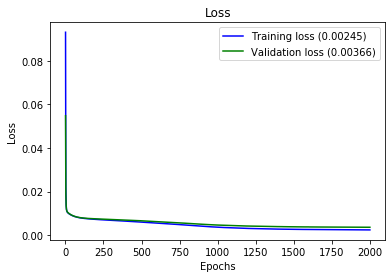

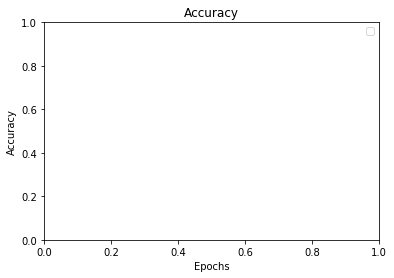

In [16]:
plot_history(history)

In [17]:
model.save("model_MSE_SGD_2.h5")

In [18]:
pickle.dump(history, open("history_MSE_SGD_2.pkl", "wb"))